In [178]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [179]:
# Data
crime = pd.read_csv("crime_data2.csv", parse_dates=['OCCURRED ON'])
moon = pd.read_excel("Moon_Phases.xlsx", parse_dates=['date'])

/Users/Akash/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [181]:
crime.head()

,INC NUMBER,OCCURRED ON,UCR CRIME CATEGORY,PREMISE TYPE,YEAR
0,2.02E+14,2015-11-01,MOTOR VEHICLE THEFT,SINGLE FAMILY HOUSE,2015.0
1,2.02E+14,2015-11-01,RAPE,SINGLE FAMILY HOUSE,2015.0
2,2.02E+14,2015-11-01,LARCENY-THEFT,APARTMENT,2015.0
3,2.02E+14,2015-11-01,MOTOR VEHICLE THEFT,SINGLE FAMILY HOUSE,2015.0
4,2.02E+14,2015-11-01,MOTOR VEHICLE THEFT,SINGLE FAMILY HOUSE,2015.0


In [182]:
moon.head()

,date,time,phase,phaseid,datetime,timestamp,friendlydate
0,2016-01-01,10:30 PM,Last Quarter,4,2016-01-01 22:30:00,1451712600,"January 1, 2016"
1,2016-01-09,06:31 PM,New Moon,1,2016-01-09 18:31:00,1452389460,"January 9, 2016"
2,2016-01-16,04:26 PM,First Quarter,2,2016-01-16 16:26:00,1452986760,"January 16, 2016"
3,2016-01-23,06:46 PM,Full Moon,3,2016-01-23 18:46:00,1453599960,"January 23, 2016"
4,2016-01-31,08:28 PM,Last Quarter,4,2016-01-31 20:28:00,1454297280,"January 31, 2016"


In [183]:
crime['OCCURRED ON'] = pd.to_datetime(crime['OCCURRED ON'])
moon['date'] = pd.to_datetime(moon['date'])

In [226]:
merged_df = pd.merge(crime, moon, how = "inner", left_on = "OCCURRED ON", right_on = "date")
merged_df.head()

,INC NUMBER,OCCURRED ON,UCR CRIME CATEGORY,PREMISE TYPE,YEAR,date,time,phase,phaseid,datetime,timestamp,friendlydate
0,2.02E+14,2016-01-01,RAPE,UNKNOWN,2016.0,2016-01-01,10:30 PM,Last Quarter,4,2016-01-01 22:30:00,1451712600,"January 1, 2016"
1,2.02E+14,2016-01-01,RAPE,SINGLE FAMILY HOUSE,2016.0,2016-01-01,10:30 PM,Last Quarter,4,2016-01-01 22:30:00,1451712600,"January 1, 2016"
2,2.02E+14,2016-01-01,MOTOR VEHICLE THEFT,DRIVEWAY,2016.0,2016-01-01,10:30 PM,Last Quarter,4,2016-01-01 22:30:00,1451712600,"January 1, 2016"
3,2.02E+14,2016-01-01,LARCENY-THEFT,SINGLE FAMILY HOUSE,2016.0,2016-01-01,10:30 PM,Last Quarter,4,2016-01-01 22:30:00,1451712600,"January 1, 2016"
4,2.02E+14,2016-01-01,LARCENY-THEFT,SINGLE FAMILY HOUSE,2016.0,2016-01-01,10:30 PM,Last Quarter,4,2016-01-01 22:30:00,1451712600,"January 1, 2016"


In [227]:
crime_counts = merged_df["phase"].value_counts()
crime_counts

Full Moon        6628
Last Quarter     6585
New Moon         6548
First Quarter    6369
Name: phase, dtype: int64

In [186]:
crime_by_year_phase = merged_df.groupby([merged_df.date.dt.year, merged_df.phase]).size().reset_index()
crime_by_year_phase.rename(columns={0: "crime_count"}, inplace=True)

number_of_phases_by_year = moon.groupby([moon.date.dt.year, moon.phase])['phaseid'].size().reset_index()
number_of_phases_by_year.rename(columns={"phaseid": "moon_count"}, inplace=True)

counts_by_year = pd.merge(crime_by_year_phase, number_of_phases_by_year, how = "inner", on = ['date','phase'])
counts_by_year['crime_rate'] = counts_by_year['crime_count'] / counts_by_year['moon_count']
counts_by_year

,date,phase,crime_count,moon_count,crime_rate
0,2016,First Quarter,2025,12,168.750000
1,2016,Full Moon,2143,12,178.583333
2,2016,Last Quarter,2281,13,175.461538
3,2016,New Moon,2306,13,177.384615
4,2017,First Quarter,2275,13,175.000000
5,2017,Full Moon,2114,12,176.166667
6,2017,Last Quarter,2105,12,175.416667
7,2017,New Moon,2144,12,178.666667
8,2018,First Quarter,2069,12,172.416667
9,2018,Full Moon,2371,13,182.384615


Text(0,0.5,'Crime Rate (crimes per day)')

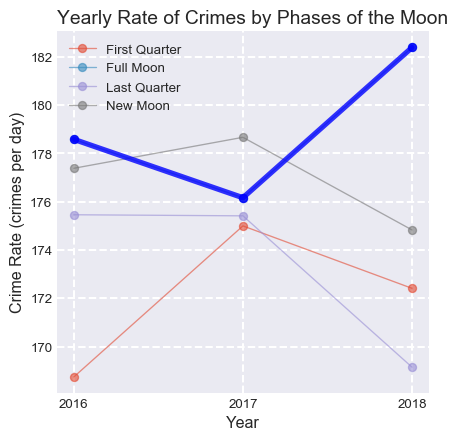

In [189]:
phases = counts_by_year['phase'].unique()

plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
plt.grid(color='white', linestyle='--', linewidth=1.5)
for i in range(len(phases)):
   plt.plot(counts_by_year[counts_by_year['phase']==phases[i]]['date'], 
            counts_by_year[counts_by_year['phase']==phases[i]]['crime_rate'], 
            marker='o', linewidth=1, alpha=0.6, label = phases[i])
plt.legend()
plt.xticks(np.arange(min(counts_by_year['date']), max(counts_by_year['date']+1), 1.0))
plt.plot(counts_by_year[counts_by_year['phase']=="Full Moon"]['date'],
         counts_by_year[counts_by_year['phase']=="Full Moon"]['crime_rate'], 
         marker='o', color='blue', linewidth=4, alpha=0.8)
plt.title("Yearly Rate of Crimes by Phases of the Moon", loc='left')
plt.xlabel("Year")
plt.ylabel("Crime Rate (crimes per day)")

In [190]:
# Data
calls2016 = pd.read_csv("callsforsrvc2016.csv")
calls2017 = pd.read_csv("callsforsrvc2017.csv")
calls2018 = pd.read_csv("callsforsrvc2018.csv")

calls_data = pd.concat([calls2016, calls2017])
calls_data = pd.concat([calls_data, calls2018])

calls_data.head()

,INCIDENT_NUM,DISP_CODE,DISPOSITION,FINAL_RADIO_CODE,FINAL_CALL_TYPE,DATE,TIME,HUNDREDBLOCKADDR,GRID
0,2.016000e+11,N,NO ACTION REQUIRED,900,CHECK WELFARE,1/1/2016,5:13:47PM,29XX W PALO VERDE DR,CA22
1,2.016000e+11,N,NO ACTION REQUIRED,647,SUSPICIOUS PERSON,1/1/2016,4:47:13PM,17XX W BELL RD,DG25
2,2.016000e+11,N,NO ACTION REQUIRED,418T,TRESPASSING,1/1/2016,5:48:45PM,51XX E THOMAS RD,BF39
3,2.016000e+11,N,NO ACTION REQUIRED,491A,CUSTODIAL INTERFERENCE,1/1/2016,6:11:54PM,61XX W MCDOWELL RD,BC14A
4,2.016000e+11,N,NO ACTION REQUIRED,651,LOOSE ANIMALS,1/1/2016,12:51:12PM,13XX E PUEBLO AVE,AF30


In [192]:
calls_data['DATE'] = pd.to_datetime(calls_data['DATE'])

In [228]:
merged_df = pd.merge(calls_data, moon, how = "inner", left_on = "DATE", right_on = "date")
merged_df.head()

,INCIDENT_NUM,DISP_CODE,DISPOSITION,FINAL_RADIO_CODE,FINAL_CALL_TYPE,DATE,TIME,HUNDREDBLOCKADDR,GRID,date,time,phase,phaseid,datetime,timestamp,friendlydate
0,2.016000e+11,N,NO ACTION REQUIRED,900,CHECK WELFARE,2016-01-01,5:13:47PM,29XX W PALO VERDE DR,CA22,2016-01-01,10:30 PM,Last Quarter,4,2016-01-01 22:30:00,1451712600,"January 1, 2016"
1,2.016000e+11,N,NO ACTION REQUIRED,647,SUSPICIOUS PERSON,2016-01-01,4:47:13PM,17XX W BELL RD,DG25,2016-01-01,10:30 PM,Last Quarter,4,2016-01-01 22:30:00,1451712600,"January 1, 2016"
2,2.016000e+11,N,NO ACTION REQUIRED,418T,TRESPASSING,2016-01-01,5:48:45PM,51XX E THOMAS RD,BF39,2016-01-01,10:30 PM,Last Quarter,4,2016-01-01 22:30:00,1451712600,"January 1, 2016"
3,2.016000e+11,N,NO ACTION REQUIRED,491A,CUSTODIAL INTERFERENCE,2016-01-01,6:11:54PM,61XX W MCDOWELL RD,BC14A,2016-01-01,10:30 PM,Last Quarter,4,2016-01-01 22:30:00,1451712600,"January 1, 2016"
4,2.016000e+11,N,NO ACTION REQUIRED,651,LOOSE ANIMALS,2016-01-01,12:51:12PM,13XX E PUEBLO AVE,AF30,2016-01-01,10:30 PM,Last Quarter,4,2016-01-01 22:30:00,1451712600,"January 1, 2016"


In [229]:
call_counts = merged_df["phase"].value_counts()
call_counts

Last Quarter     71719
Full Moon        69387
New Moon         69224
First Quarter    68763
Name: phase, dtype: int64

In [195]:
calls_by_year_phase = merged_df.groupby([merged_df.date.dt.year, merged_df.phase]).size().reset_index()
calls_by_year_phase.rename(columns={0: "call_count"}, inplace=True)

counts_by_year = pd.merge(calls_by_year_phase, number_of_phases_by_year, how = "inner", on = ['date','phase'])
counts_by_year['call_rate'] = counts_by_year['call_count'] / counts_by_year['moon_count']
counts_by_year

,date,phase,call_count,moon_count,call_rate
0,2016,First Quarter,22544,12,1878.666667
1,2016,Full Moon,22690,12,1890.833333
2,2016,Last Quarter,24523,13,1886.384615
3,2016,New Moon,24302,13,1869.384615
4,2017,First Quarter,24091,13,1853.153846
5,2017,Full Moon,22776,12,1898.000000
6,2017,Last Quarter,22747,12,1895.583333
7,2017,New Moon,22565,12,1880.416667
8,2018,First Quarter,22128,12,1844.000000
9,2018,Full Moon,23921,13,1840.076923


Text(0,0.5,'Call Rate (calls per day)')

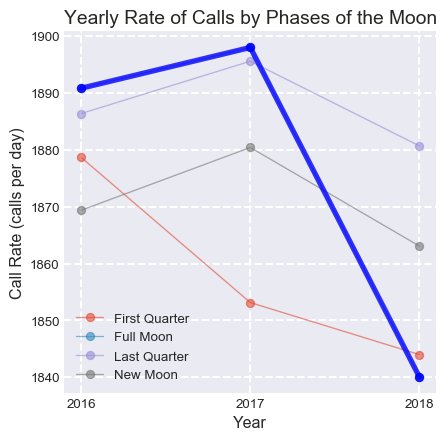

In [198]:
phases = counts_by_year['phase'].unique()

plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
plt.grid(color='white', linestyle='--', linewidth=1.5)
for i in range(len(phases)):
   plt.plot(counts_by_year[counts_by_year['phase']==phases[i]]['date'], 
            counts_by_year[counts_by_year['phase']==phases[i]]['call_rate'], 
            marker='o', linewidth=1, alpha=0.6, label = phases[i])
plt.legend()
plt.xticks(np.arange(min(counts_by_year['date']), max(counts_by_year['date']+1), 1.0))
plt.plot(counts_by_year[counts_by_year['phase']=="Full Moon"]['date'],
         counts_by_year[counts_by_year['phase']=="Full Moon"]['call_rate'], 
         marker='o', color='blue', linewidth=4, alpha=0.8)
plt.title("Yearly Rate of Calls by Phases of the Moon", loc='left')
plt.xlabel("Year")
plt.ylabel("Call Rate (calls per day)")

In [199]:
# Data
ois2017 = pd.read_csv("ois_clean_2017.csv")
ois2018 = pd.read_csv("ois_clean_2018.csv")

ois_data = pd.concat([ois2017, ois2018])

ois_data.head()

,DATE,TIME,HOUR,DAY_OF_WEEK,MONTH,QUARTER,YEAR,INC_RPT,PRECINCT,COUNCIL_DIST,...,SP_INJURY_LEVEL,FATALITY_FLG,SP_GENDER,SP_ETHNICITY,SP_RACE,SP_AGE_AT_INC,SP_AGE_GROUP,PO_RACE,PO_ETHNICITY,REFERENCE_ID
0,01/09/17,1538,15,01 - Monday,1-Jan,1,2017,2017-51067,900 Cactus Park,1,...,Fatal,Fatal,Male,Non-Hispanic,Black,38,30's,White,Non-Hispanic,6256
1,03/02/17,1645,16,04 - Thursday,3-Mar,1,2017,2017-370161,700 Mountain View,8,...,Fatal,Fatal,Male,Hispanic,White,27,20's,Hispanic,Hispanic,8920
2,03/15/17,1347,13,03 - Wednesday,3-Mar,1,2017,2017-451326,200 Black Mountain,2,...,Fatal,Fatal,Male,Non-Hispanic,White,25,20's,Asian,Non-Hispanic,9422
3,03/23/17,1725,17,04 - Thursday,3-Mar,1,2017,2017-504654,800 Maryvale / Estrella Mountain,7,...,Fatal,Fatal,Male,Hispanic,White,24,20's,White,Non-Hispanic,9339
4,04/09/17,1533,15,07 - Sunday,4-Apr,2,2017,2017-612995,500 Central City,8,...,Injured,Non-fatal,Male,Non-Hispanic,Black,23,20's,White,Non-Hispanic,9781


In [200]:
ois_data['DATE'] = pd.to_datetime(ois_data['DATE'])

In [230]:
merged_df = pd.merge(ois_data, moon, how = "inner", left_on = "DATE", right_on = "date")
merged_df.head()

,DATE,TIME,HOUR,DAY_OF_WEEK,MONTH,QUARTER,YEAR,INC_RPT,PRECINCT,COUNCIL_DIST,...,PO_RACE,PO_ETHNICITY,REFERENCE_ID,date,time,phase,phaseid,datetime,timestamp,friendlydate
0,2017-04-19,1932,19,03 - Wednesday,4-Apr,2,2017,2017-677763,800 Maryvale / Estrella Mountain,7,...,Hispanic,Hispanic,7782,2017-04-19,02:57 AM,Last Quarter,4,2017-04-19 02:57:00,1492595820,"April 19, 2017"
1,2017-06-23,2154,21,05 - Friday,6-Jun,2,2017,2017-1094550,700 Mountain View,8,...,White,Non-Hispanic,8304,2017-06-23,07:31 PM,New Moon,1,2017-06-23 19:31:00,1498271460,"June 23, 2017"
2,2017-11-10,1354,13,05 - Friday,11-Nov,4,2017,2017-1982153,700 Mountain View,7,...,White,Non-Hispanic,9553,2017-11-10,01:36 PM,Last Quarter,4,2017-11-10 13:36:00,1510346160,"November 10, 2017"
3,2018-03-09,1310,13,05 - Friday,3-Mar,1,2018,2018-417842,800 Maryvale / Estrella Mountain,4,...,White,Hispanic,9159,2018-03-09,04:20 AM,Last Quarter,4,2018-03-09 04:20:00,1520594400,"March 9, 2018"
4,2018-05-21,1720,17,01 - Monday,5-May,2,2018,2018-896082,700 Mountain View,7,...,White,Hispanic,8659,2018-05-21,08:49 PM,First Quarter,2,2018-05-21 20:49:00,1526960940,"May 21, 2018"


In [231]:
ois_counts = merged_df["phase"].value_counts()
ois_x = ois_counts.index
ois_y = ois_counts.values / moon["phase"].value_counts().values
ois_y

array([0.10526316, 0.08108108, 0.05405405, 0.05405405])

([<matplotlib.axis.XTick at 0x1a2b9f6cc0>,
 <a list of 4 Text xticklabel objects>)

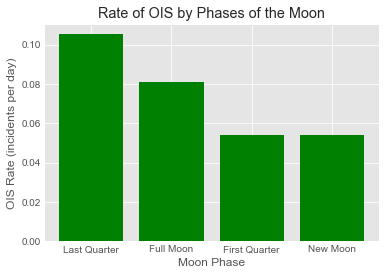

In [203]:
plt.style.use('ggplot')

x_pos = [i for i, _ in enumerate(ois_x)]

plt.bar(x_pos, ois_y, color='green')
plt.xlabel("Moon Phase")
plt.ylabel("OIS Rate (incidents per day)")
plt.title("Rate of OIS by Phases of the Moon")

plt.xticks(x_pos, ois_x)

In [213]:
import scipy.stats as stats
stats.chisquare(ois_counts)

Power_divergenceResult(statistic=1.0, pvalue=0.8012519569012009)

In [214]:
stats.chisquare(crime_counts)

Power_divergenceResult(statistic=5.947034060466896, pvalue=0.11421576148901053)

In [215]:
stats.chisquare(call_counts)

Power_divergenceResult(statistic=75.34997653112045, pvalue=3.0485633580157474e-16)

In [232]:
crime_summary = pd.DataFrame(crime_counts)
crime_summary.rename(columns={"phase": "No. of Crimes"}, inplace=True)
crime_summary

,No. of Crimes
Full Moon,6628
Last Quarter,6585
New Moon,6548
First Quarter,6369


In [233]:
calls_summary = pd.DataFrame(call_counts)
calls_summary.rename(columns={"phase": "No. of Calls"}, inplace=True)
calls_summary

,No. of Calls
Last Quarter,71719
Full Moon,69387
New Moon,69224
First Quarter,68763


In [234]:
ois_summary = pd.DataFrame(ois_counts)
ois_summary.rename(columns={"phase": "No. of OIS"}, inplace=True)
ois_summary

,No. of OIS
Last Quarter,4
Full Moon,3
First Quarter,2
New Moon,2


In [236]:
moon["phase"].value_counts()

Last Quarter     38
First Quarter    37
New Moon         37
Full Moon        37
Name: phase, dtype: int64

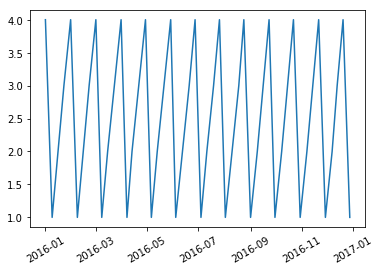

In [70]:
moon_2016 = merged_df[(merged_df['date'] >= '2016-01-01') & (merged_df['date'] < '2017-01-01')]

plt.plot(moon_2016['date'], moon_2016['phaseid'])